In [7]:
# IRIS DATASET

In [1]:


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load and drop the ID column
df = pd.read_csv('Iris.csv')
if 'Id' in df.columns:
    df = df.drop('Id', axis=1)

# Encode the Target (Species names to 0, 1, 2)
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

# Define Features and Target
X = df.drop('Species', axis=1)
y = df['Species']

# Split into 80% Training and 20% Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [2]:
# df=pd.read_csv('Iris.csv')
# df.head()

In [3]:
scaler = StandardScaler()

# Fit only on training data to avoid "Data Leakage"
X_train_scaled = scaler.fit_transform(X_train)

# Transform test data using the training mean/std
X_test_scaled = scaler.transform(X_test)

In [4]:
# Initialize and train the model
# max_iter is increased to ensure the solver has enough steps to find the minimum error
log_model =LogisticRegression(solver='lbfgs', max_iter=200)
log_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = log_model.predict(X_test_scaled)

Model Accuracy: 100.00%


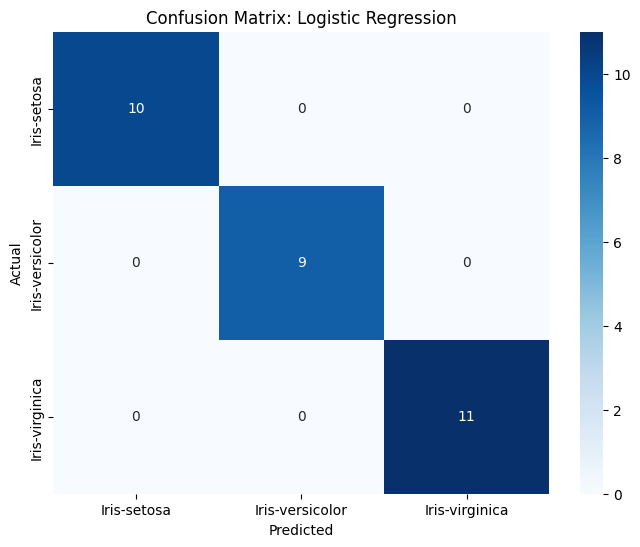


Detailed Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [5]:
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Plotting the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix: Logistic Regression')
plt.show()

print("\nDetailed Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

In [6]:
import numpy as np

# 1. Your input data as a NumPy array
# Format: [SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm]
new_data = np.array([[5.1, 3.5, 1.4, 0.2],  # Example: Setosa
                     [6.7, 3.0, 5.2, 2.3]]) # Example: Virginica

# 2. Scale the input

new_data_scaled = scaler.transform(new_data)

# 3. Make the prediction (this returns numbers like 0, 1, or 2)
numeric_predictions = log_model.predict(new_data_scaled)

# 4. Convert numbers back to original names (Inverse Transform)
# Using the 'le' (LabelEncoder) object from our training
final_species = le.inverse_transform(numeric_predictions)

# 5. Display results
for i, species in enumerate(final_species):
    print(f"Input {new_data[i]} --> Predicted Species: {species}")

Input [5.1 3.5 1.4 0.2] --> Predicted Species: Iris-setosa
Input [6.7 3.  5.2 2.3] --> Predicted Species: Iris-virginica


c:\Users\n8877\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
